In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from scipy import stats 
from scipy.stats import kurtosis
import scipy
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
from sklearn.model_selection import train_test_split as split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv('city_temperature.csv')
data.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [7]:
cols=["Year","Month","Day"]
data['date'] = data[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [8]:
data.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,date
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2,1995-1-1
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4,1995-1-2
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8,1995-1-3
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4,1995-1-4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9,1995-1-5


In [9]:
# extracting raw data
London_data = data[data.City == 'London']
London_data.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,date
986835,Europe,United Kingdom,NaN,London,1,1,1995,34.2,1995-1-1
986836,Europe,United Kingdom,NaN,London,1,2,1995,32.6,1995-1-2
986837,Europe,United Kingdom,NaN,London,1,3,1995,30.9,1995-1-3
986838,Europe,United Kingdom,NaN,London,1,4,1995,37.7,1995-1-4
986839,Europe,United Kingdom,NaN,London,1,5,1995,39.5,1995-1-5


In [10]:
data1 = London_data.copy()

In [11]:
#Converting the Datatype of Date
data1['date']=pd.to_datetime(data1['date'])
data1['date'].dtype

dtype('<M8[ns]')

In [12]:
data1.set_index('date',inplace=True)

In [13]:
data1['date']=data1.index

In [14]:
data1.tail()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,date
date,,,,,,,,,
2020-05-09,Europe,United Kingdom,NaN,London,5,9,2020,64.1,2020-05-09
2020-05-10,Europe,United Kingdom,NaN,London,5,10,2020,54.1,2020-05-10
2020-05-11,Europe,United Kingdom,NaN,London,5,11,2020,47.0,2020-05-11
2020-05-12,Europe,United Kingdom,NaN,London,5,12,2020,48.9,2020-05-12
2020-05-13,Europe,United Kingdom,NaN,London,5,13,2020,47.8,2020-05-13


In [15]:
#dropping unwanted columns
cols = ['Region', 'Country', 'State', 'City', 'Month', 'Day', 'Year','date','date']
data1.drop(cols, axis = 1, inplace = True)
data1.head()

,AvgTemperature
date,
1995-01-01,34.2
1995-01-02,32.6
1995-01-03,30.9
1995-01-04,37.7
1995-01-05,39.5


In [16]:
data1 = data1['2010':'2020']
data1.head()

,AvgTemperature
date,
2010-01-01,33.4
2010-01-02,35.2
2010-01-03,32.8
2010-01-04,27.0
2010-01-05,29.6


# EDA process

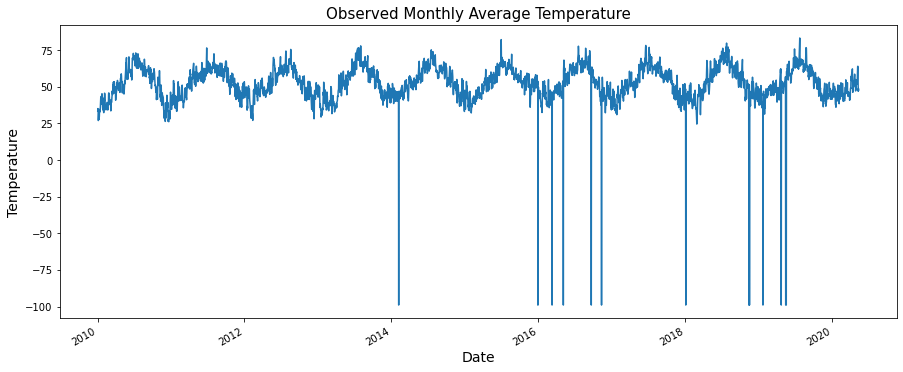

In [17]:
data1.plot(figsize = (15, 6), legend = None)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Observed Average Temperature', fontsize = 15)
plt.show()

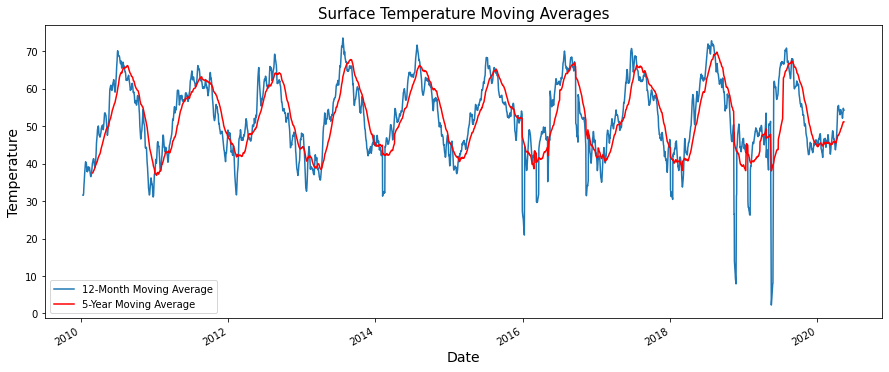

In [18]:
yearly = data1['AvgTemperature'].rolling(window = 12).mean()
fiveyearly = data1['AvgTemperature'].rolling(window = 60).mean()
MAax = yearly['2000':].plot(figsize = (15, 6), label = '12-Month Moving Average')
fiveyearly['2000':].plot(ax = MAax, color = 'red', label = '5-Year Moving Average')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Surface Temperature Moving Averages', fontsize = 15)
plt.legend()
plt.show()

In [19]:
data1.dtypes

AvgTemperature    float64
dtype: object

In [20]:
#resampling
monthly_mean = data1['AvgTemperature'].resample('m').mean()

In [21]:
monthly_data = monthly_mean.to_frame()
monthly_data

,AvgTemperature
date,
2010-01-31,35.919355
2010-02-28,39.200000
2010-03-31,44.722581
2010-04-30,50.760000
2010-05-31,54.164516
...,...
2020-01-31,45.270968
2020-02-29,45.789655
2020-03-31,45.500000


# Decomposition

<Figure size 1440x1152 with 0 Axes>

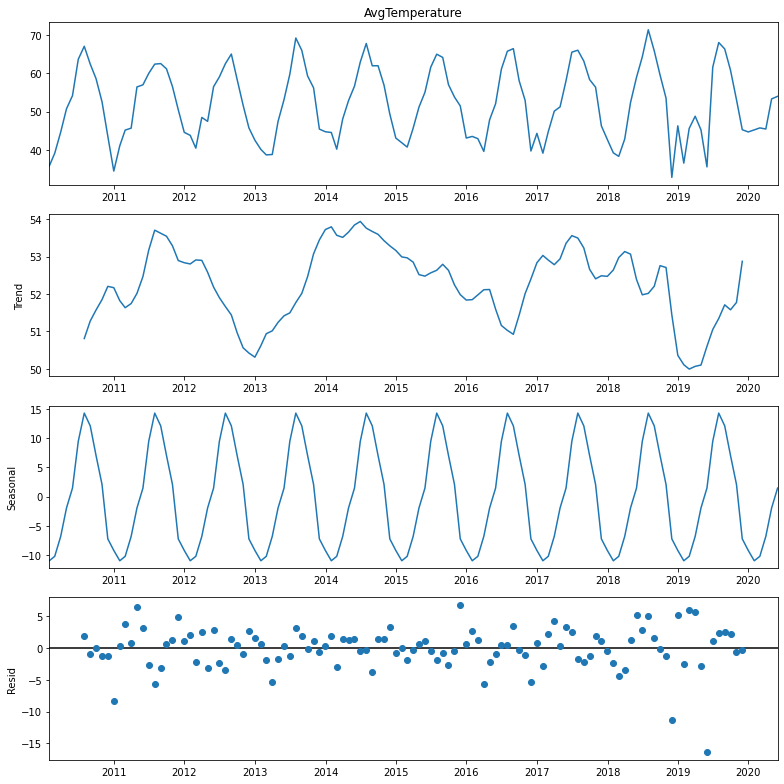

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,11
plt.figure(figsize=(20,16))
decomposed_series = sd(monthly_data['AvgTemperature'],model='additive')
decomposed_series.plot()
plt.show()

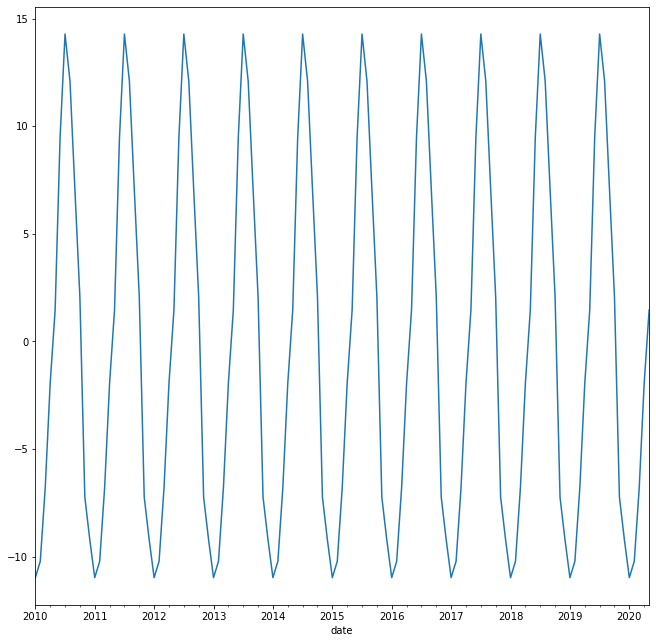

<Figure size 1080x216 with 0 Axes>

In [23]:
##Drilling Down and Observing Seasonality
decomposed_series.seasonal['2010':'2020'].plot()
fig = plt.figure(figsize=(15,3))

# finding the model stationary or not

In [24]:
def ad_fuller_func(X):
    result_ad_fuller = adfuller(X)
    print('ADF Statistic: %f' % result_ad_fuller[0])
    print('p-value: %f' %result_ad_fuller[1])
    print('Critical Values:')
    for key, value in result_ad_fuller[4].items():
        print('\t%s: %.3f' % (key, value))
    if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
        print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
    else:
        print('Failed to Reject Ho-Time Series is Non-Stationary')

In [25]:
ad_fuller_func(monthly_data['AvgTemperature'])

ADF Statistic: -8.755365
p-value: 0.000000
Critical Values:
	1%: -3.488
	5%: -2.887
	10%: -2.580
Reject Null Hypothesis(Ho)-Time Series is Stationary


In [26]:
#modelling

modelling_series = monthly_data['AvgTemperature']
modelling_series

date
2010-01-31    35.919355
2010-02-28    39.200000
2010-03-31    44.722581
2010-04-30    50.760000
2010-05-31    54.164516
                ...    
2020-01-31    45.270968
2020-02-29    45.789655
2020-03-31    45.500000
2020-04-30    53.326667
2020-05-31    53.984615
Freq: M, Name: AvgTemperature, Length: 125, dtype: float64

In [27]:
#Splitting the Data into Train and Test
train,test=split(modelling_series,train_size=0.7,shuffle=False)

In [28]:
train.head()

date
2010-01-31    35.919355
2010-02-28    39.200000
2010-03-31    44.722581
2010-04-30    50.760000
2010-05-31    54.164516
Freq: M, Name: AvgTemperature, dtype: float64

In [29]:
train.tail()

date
2016-11-30    39.793333
2016-12-31    44.374194
2017-01-31    39.225806
2017-02-28    44.828571
2017-03-31    50.138710
Freq: M, Name: AvgTemperature, dtype: float64

In [30]:
test.head()

date
2017-04-30    51.253333
2017-05-31    58.074194
2017-06-30    65.470000
2017-07-31    65.974194
2017-08-31    63.148387
Freq: M, Name: AvgTemperature, dtype: float64

In [31]:
test.tail()

date
2020-01-31    45.270968
2020-02-29    45.789655
2020-03-31    45.500000
2020-04-30    53.326667
2020-05-31    53.984615
Freq: M, Name: AvgTemperature, dtype: float64

In [32]:
print('Length of Training Data',len(train))
print('Length of Testing Data',len(test))

Length of Training Data 87
Length of Testing Data 38


# The Autoregressive Integrated Moving Average (ARIMA) Model:

Autoregressive Integrated Moving Average (ARIMA) is a model used in statistics and econometrics to measure events that happen over a period of time. The model is used to understand past data or predict future data in a series.

AR (Autoregression) : Model that shows a changing variable that regresses on its own lagged/prior values.
I (Integrated) : Differencing of raw observations to allow for the time series to become stationary
MA (Moving average) : Dependency between an observation and a residual error from a moving average model
For ARIMA models, a standard notation would be ARIMA with p, d, and q, where integer values substitute for the parameters to indicate the type of ARIMA model used.

p: the number of lag observations in the model; also known as the lag order.
d: the number of times that the raw observations are differenced; also known as the degree of differencing.
q: the size of the moving average window; also known as the order of the moving average.

Building Sarimax models

In [33]:
import itertools
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of grid search Model parameter combinations for Seasonal-ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))

Examples of grid search Model parameter combinations for Seasonal-ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


# Hyper Parameter Tuning for Model Order

In [34]:
smallest=None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            sar_results = model.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, sar_results.aic))
            if smallest is None or sar_results.aic<smallest:
                smallest=sar_results.aic
                valor1=param
                valor2=param_seasonal
        except:
                    continue
print('Value AIC Minimum:',smallest)
print('Optimal pdq parameters:',valor1)
print('Optimal PDQS parameters:',valor2) 

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:928.4613038995202
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:733.195812696691
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:2718.1520041747112
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:422.45939577317716
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:315.041639796672
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:2127.698304349102
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:416.13487098285975
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:300.2180568954441
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:217.88063003045616
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:430.7311445306373
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:391.02763509840804
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:2263.4497985154767
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:341.60999184386253
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:318.8924629270346
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:2432.9034039489584
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:323.6428060309619
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:299.9327146327065
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:228.7897864664297
ARIM

ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:248.26499307191773
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:323.18846862764417
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:286.6258894930568
ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:213.80457855182183
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:343.590046707884
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:330.1206909994779
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:2955.755351747864
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:260.44339166544097
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:255.64111917770126
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:239.91206392354408
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:227.45657864344864
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:226.39084273775947
ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:206.33863114991132
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:543.3960500458215
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:468.38694582889167
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:2236.754483062779
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:509.12282590235463
ARIMA(0, 2, 0)x(0, 1, 1, 12)12 - AIC:400.1053493793148


ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:421.033403166359
ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:2246.6720111848463
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:405.29454742945165
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:304.4035566866926
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:2154.8667006830196
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:392.4958614667171
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:287.38340962477105
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:212.08053543269128
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:417.51160397313646
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:380.07910775142636
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:2094.3956813913046
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:333.9739108940623
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:306.9756907934225
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:2701.2407441576047
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:314.5676027740896
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:287.1678117257193
ARIMA(1, 0, 2)x(1, 2, 2, 12)12 - AIC:217.71514071105457
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:337.587065408619
AR

ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:258.5643468429564
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:319.1234742902334
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:296.8713240939107
ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:225.39250660984283
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:344.0016980373254
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:330.2672325104698
ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:2296.9408994989476
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:262.96389960551437
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:256.50848149174
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:248.93538960744237
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:227.27379020083674
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:223.97909131277743
ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:216.12316328927034
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:511.0843001336685
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:428.3607051450932
ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:1828.1734074632257
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:412.6527460241287
ARIMA(1, 2, 2)x(0, 1, 1, 12)12 - AIC:305.922532088377
ARIMA

ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:515.9956433719423
ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:436.6302899088796
ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:2643.9153242541847
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:421.029851138807
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:313.72009688541937
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:2123.0817673916195
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:404.87325327273675
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:299.91866858770214
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:213.40123403730047
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:416.54296483788306
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:385.70186429650425
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:2652.810019818011
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:338.88782867201394
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:323.9768103884886
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:254.2146888443522
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:312.41754799579235
ARIMA(2, 1, 1)x(1, 2, 1, 12)12 - AIC:300.88991522140464
ARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:223.97673235097736

By Observing the Lowest AIC , we come to Seasonality Order of (0,0,2)12 and non-seasonal component is (2,2,1) as derived earlier by correlograms.

Seasonal Arima is used as we have seasonality component present

In [35]:
model = sm.tsa.SARIMAX(train,order=(2, 2, 1),seasonal_order=(0, 0, 2, 12))
sar_results=model.fit()
sar_forecasts_train = sar_results.predict(start='2010-01-31',end='2017-03-31')
sar_forecasts_test = sar_results.predict(start='2017-04-30',end='2020-05-31')

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math
mse = mean_squared_error(test, sar_forecasts_test)
print('MSE: '+str(mse))
mae = mean_absolute_error(test,sar_forecasts_test)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test,sar_forecasts_test))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(sar_forecasts_test - test)/np.abs(test))
print('MAPE: '+str(mape))

MSE: 327.88620940570587
MAE: 14.90241855456496
RMSE: 18.107628486516557
MAPE: 0.3303430296655112


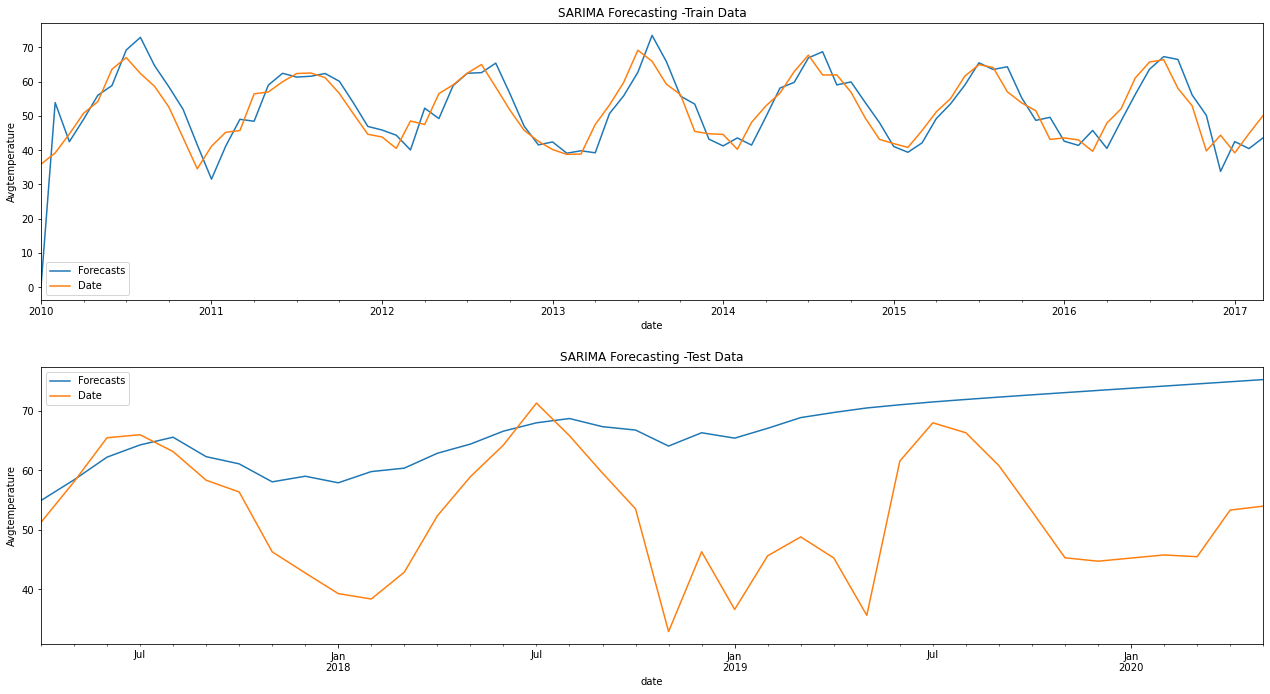

In [37]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

sar_forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
train.plot(label='Date',ax=ax1)
ax1.set_ylabel('Avgtemperature')

sar_forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
test.plot(label='Date',ax=ax2)
ax2.set_ylabel('Avgtemperature')

ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)

In [51]:
smallest=None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.arima.ARIMA(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            ar_results = model.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, ar_results.aic))
            if smallest is None or ar_results.aic<smallest:
                smallest=ar_results.aic
                valor1=param
                valor2=param_seasonal
        except:
                    continue
print('Value AIC Minimum:',smallest)
print('Optimal pdq parameters:',valor1)
print('Optimal PDQS parameters:',valor2)  

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:622.8102979025833
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:483.09739261953655
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:2984.7383957701927
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:422.45939577317716
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:315.041639796672
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:2127.698304349102
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:416.13487098285975
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:300.2180568954441
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:217.88063003045616
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:425.1923279690636
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:391.79779170639443
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:3027.79232572129
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:341.60999184386253
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:318.8924629270346
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:2432.9034039489584
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:323.6428060309619
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:299.9327146327065
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:228.7897864664297
ARIM

ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:248.26499307191773
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:323.18846862764417
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:286.6258894930568
ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:213.80457855182183
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:343.590046707884
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:330.1206909994779
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:2955.755351747864
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:260.44339166544097
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:255.64111917770126
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:239.91206392354408
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:227.45657864344864
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:226.39084273775947
ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:206.33863114991132
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:543.3960500458215
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:468.38694582889167
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:2236.754483062779
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:509.12282590235463
ARIMA(0, 2, 0)x(0, 1, 1, 12)12 - AIC:400.1053493793148


ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:407.20700493695637
ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:1569.184897885385
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:405.29454742945165
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:304.4035566866926
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:2154.8667006830196
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:392.4958614667171
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:287.38340962477105
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:212.08053543269128
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:408.7602344677613
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:380.91106187453346
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:2838.9228331588715
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:333.9739108940623
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:306.9756907934225
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:2701.2407441576047
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:314.5676027740896
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:287.1678117257193
ARIMA(1, 0, 2)x(1, 2, 2, 12)12 - AIC:217.71514071105457
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:336.93959924570413


ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:258.5643468429564
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:319.1234742902334
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:296.8713240939107
ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:225.39250660984283
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:344.0016980373254
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:330.2672325104698
ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:2296.9408994989476
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:262.96389960551437
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:256.50848149174
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:248.93538960744237
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:227.27379020083674
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:223.97909131277743
ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:216.12316328927034
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:511.0843001336685
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:428.3607051450932
ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:1828.1734074632257
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:412.6527460241287
ARIMA(1, 2, 2)x(0, 1, 1, 12)12 - AIC:305.922532088377
ARIMA

ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:515.9956433719423
ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:436.6302899088796
ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:2643.9153242541847
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:421.029851138807
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:313.72009688541937
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:2123.0817673916195
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:404.87325327273675
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:299.91866858770214
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:213.40123403730047
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:416.54296483788306
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:385.70186429650425
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:2652.810019818011
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:338.88782867201394
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:323.9768103884886
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:254.2146888443522
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:312.41754799579235
ARIMA(2, 1, 1)x(1, 2, 1, 12)12 - AIC:300.88991522140464
ARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:223.97673235097736

In [52]:
#Fitting the ARIMA model with p=2,d=1,q=1.
#ARIMA model
model2=  sm.tsa.arima.ARIMA(train, order=(2,1,1))
ar_result = model2.fit()
print(ar_result.summary())

                               SARIMAX Results                                
Dep. Variable:         AvgTemperature   No. Observations:                   87
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -259.582
Date:                Wed, 07 Dec 2022   AIC                            527.165
Time:                        10:36:01   BIC                            536.982
Sample:                    01-31-2010   HQIC                           531.116
                         - 03-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1512      0.514      0.294      0.769      -0.856       1.159
ar.L2          0.2690      0.235      1.145      0.252      -0.191       0.730
ma.L1          0.1800      0.548      0.328      0.7

In [53]:
ar_forecasts_train = ar_result.predict(start='2010-01-31',end='2017-03-31')
ar_forecasts_test = ar_result.predict(start='2017-04-30',end='2020-05-31')

In [54]:
mse = mean_squared_error(test, ar_forecasts_test)
print('MSE: '+str(mse))
mae = mean_absolute_error(test,ar_forecasts_test)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test,ar_forecasts_test))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(ar_forecasts_test - test)/np.abs(test))
print('MAPE: '+str(mape))

MSE: 133.438949167189
MAE: 9.681599688253351
RMSE: 11.551577778259947
MAPE: 0.2127000470409661


By Comparing the MAPE(Mean Absolute Percentage Error) of both the Model (SARIMAX) we can conclude that the accuracy of arima Model is Greater than the Accuracy of SARIMAX model.Our Data is best with arima Model.
we get the accuracy of 79% on ARIMA model